In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact
from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# initial mass, positions and velocities

m1 = 1
m2 = 2

m1_x_prev = np.array([1,1])
m2_x_prev = np.array([-1,-1])

m1_v = np.array([0,0.5])
m2_v = np.array([0,-0.75])

# set parameters

dt = 0.001
time = 100000

# --- first iteration ---

# calc_forces

m1_f = [m1*m2/np.power(np.linalg.norm(m2_x_prev - m1_x_prev),3)]*(m2_x_prev - m1_x_prev)

m2_f = [m1*m2/np.power(np.linalg.norm(m2_x_prev - m1_x_prev),3)]*(m1_x_prev - m2_x_prev)

# calc next positions (Euler)

m1_x = m1_x_prev + m1_v*dt + m1_f*np.power(dt,2)/(2*m1)

m2_x = m2_x_prev + m2_v*dt + m2_f*np.power(dt,2)/(2*m2)

m1_x_next = m1_x
m2_x_next = m2_x

m1_x = m1_x_prev
m2_x = m2_x_prev

In [3]:
# Loopy stuff -- Verlet algorithm

m1_x_traj = np.zeros([time,2])
m2_x_traj = np.zeros([time,2])

#pe_traj = np.zeros(time)
#ke_traj = np.zeros(time)



for i in range(time):
    
    # record trajectory 
    
    m1_x_traj[i] = m1_x
    m2_x_traj[i] = m2_x
    #pe_traj[i] = m1*m2/np.norm(m1_x-m2_x)
    #ke_traj[i] = m1*np.power(np.norm(m1_v),2) + m2*np.power(np.norm(m2_v),2)
    
    # time hath passed
    
    m1_x_prev = m1_x
    m2_x_prev = m2_x
    
    m1_x = m1_x_next
    m2_x = m2_x_next
    
    # calculate forces
    
    m1_f = [m1*m2/np.power(np.linalg.norm(m2_x_prev - m1_x_prev),3)]*(m2_x_prev - m1_x_prev)
    m2_f = [m1*m2/np.power(np.linalg.norm(m2_x_prev - m1_x_prev),3)]*(m1_x_prev - m2_x_prev)
    
    # update positions
    
    m1_x_next = 2*m1_x - m1_x_prev + m1_f*np.power(dt,2)/m1
    m2_x_next = 2*m2_x - m2_x_prev + m2_f*np.power(dt,2)/m2
    
    # update velocities
    
    m1_v = (m1_x_next - m1_x_prev)/(2*dt)
    m2_v = (m2_x_next - m2_x_prev)/(2*dt)
    

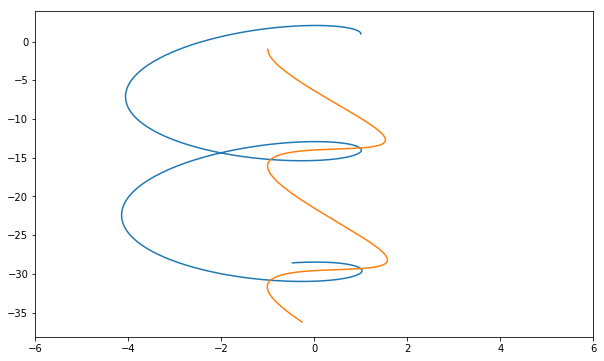

In [5]:
plt.figure(figsize=(10,6))
plt.xlim(-6,6)

plt.plot(m1_x_traj[:,0],m1_x_traj[:,1])
plt.plot(m2_x_traj[:,0],m2_x_traj[:,1])